<a href="https://colab.research.google.com/github/NourhanHassanEid/Zomato_EDA/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
 # Zomato
 It is an Indian multinational restaurant aggregator and food delivery company; it provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. The service is available in 24 countries and in more than 10,000 cities.

 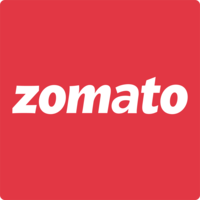

 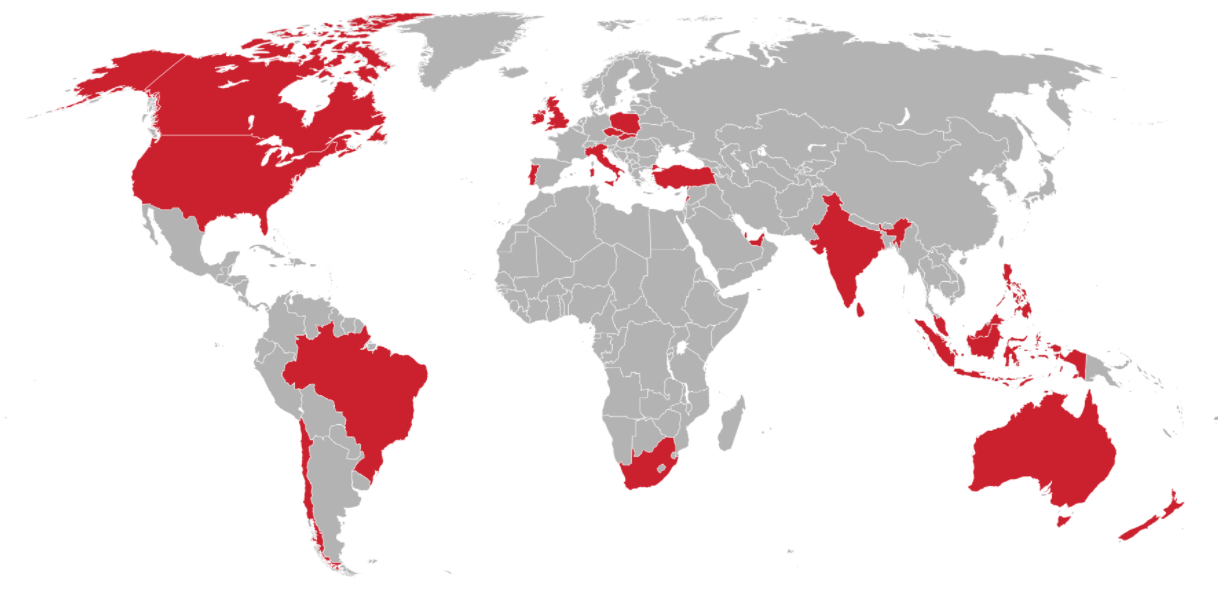

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_analysis/data science projects/Zomato_website/zomato.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
df_2 =df.copy(deep=True)

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed



In [ ]:
df.shape

(51717, 17)

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df["name"].unique())

8792

In [ ]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
feature_with_nan= [feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in feature_with_nan:
    print('{} \t has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate 	 has 15.0337 % missing values
phone 	 has 2.3358 % missing values
location 	 has 0.0406 % missing values
rest_type 	 has 0.4389 % missing values
dish_liked 	 has 54.2916 % missing values
cuisines 	 has 0.087 % missing values
approx_cost(for two people) 	 has 0.669 % missing values


In [ ]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
g1_rate = df.groupby("name")

In [ ]:
g1_rate["rate"].unique() 

name
#FeelTheROLL                                                        [3.4/5, 3.4 /5]
#L-81 Cafe                                                          [3.9/5, 3.9 /5]
#Vibes Restro                                                                 [nan]
#refuel                                                                     [3.7/5]
'Brahmins' Thatte Idli                                                        [nan]
                                                               ...                 
late100                                                                       [nan]
nu.tree                                         [4.4/5, 4.3/5, nan, 4.3 /5, 4.2 /5]
re:cess - Hilton Bangalore Embassy GolfLinks                               [4.1 /5]
repEAT Hub                                                                    [nan]
sCoolMeal                                                                     [nan]
Name: rate, Length: 8792, dtype: object

### first solution: dropping the missing values

In [ ]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

second solution: impute by mean values

In [ ]:
values = {"rate": '0.0'}
df_2.fillna(values,inplace=True)

In [ ]:
df_2["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '0.0', '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5',
       '2.3/5', '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5',
       '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5',
       '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5',
       '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5',
       '4.6 /5', '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5',
       '2.4 /5', '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def split(x):
    return x.split('/')[0]

In [ ]:
df['rate']=df['rate'].apply(split)
df_2['rate']=df_2['rate'].apply(split)

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df.replace('NEW',np.nan,inplace=True)
df.replace('-',np.nan,inplace=True)

In [ ]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
df_2.replace('NEW',0,inplace=True)
df_2.replace('-',0,inplace=True)

In [ ]:
df_2['rate']=df_2['rate'].replace(0, np.nan)

In [ ]:
df_2['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '0.0',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate']=df['rate'].astype(float)
df_2['rate']=df_2['rate'].astype(float)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

In [ ]:
impute_knn =KNNImputer(n_neighbors =5)
rate_2 =impute_knn.fit_transform(df_2["rate"].to_frame())
df_2['rate'] = rate_2

In [ ]:
df_2["rate"].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.11851133, 2.9       , 3.5       , 0.        , 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

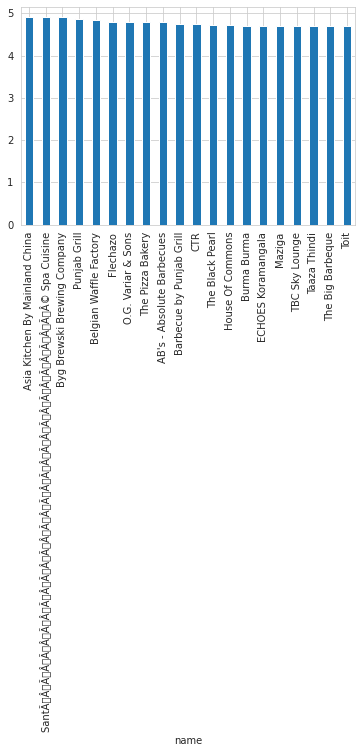

In [ ]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

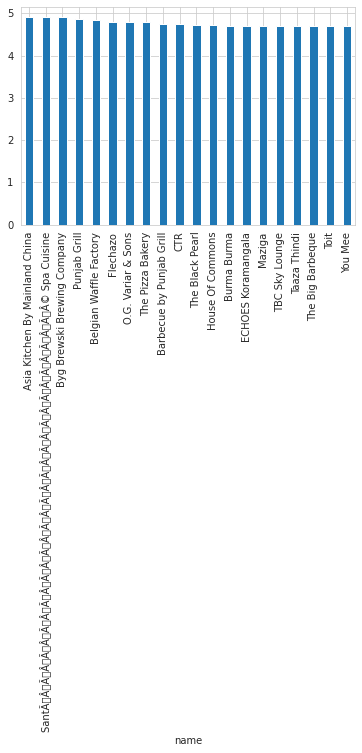

In [ ]:
df_2.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [ ]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [ ]:
df_rate_2=df_2.groupby('name')['rate'].mean().to_frame()
df_rate_2=df_rate_2.reset_index()
df_rate_2.columns=['restaurant','rating']
df_rate_2.head(20)

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#Vibes Restro,0.000000
3,#refuel,3.700000
4,'Brahmins' Thatte Idli,0.000000
5,1 Fahreheit,0.000000
6,1000 B.C,3.200000
7,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
8,11 to 11 Express Biriyanis,3.500000
9,1131 Bar + Kitchen,4.500000


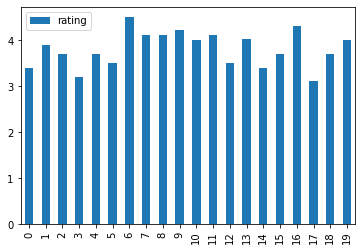

In [ ]:
df_rate.head(20).plot.bar()

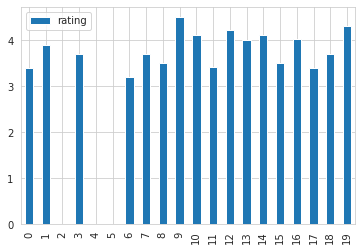

In [ ]:
df_rate_2.head(20).plot.bar()

## Rating distribution

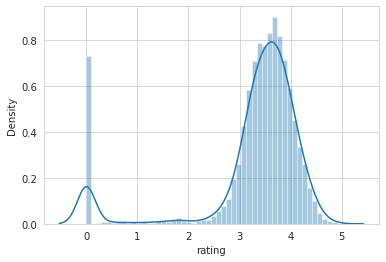

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

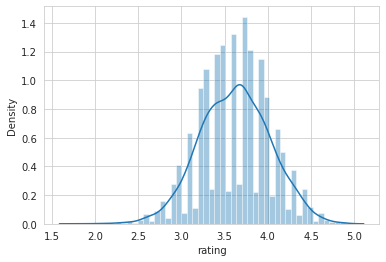

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

conclusion : Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

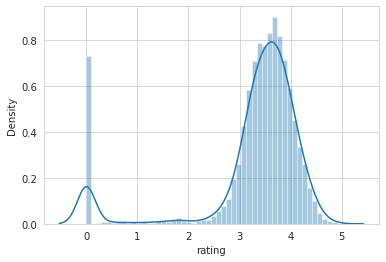

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate_2['rating'])

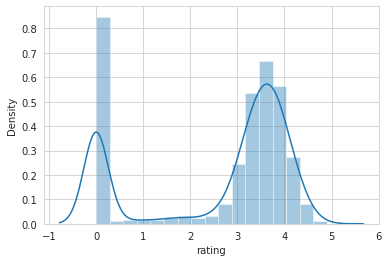

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate_2['rating'])

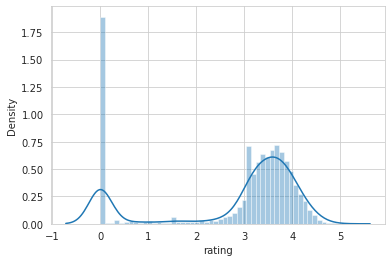

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate_2['rating'])

## Which are the top restaurant chains in Bangaluru?

In [ ]:
df['name'].value_counts()[0:20]

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Kanti Sweets           68
Five Star Chicken      68
Just Bake              68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Domino's Pizza         60
Sweet Truth            60
KFC                    60
Beijing Bites          60
Smoor                  59
McDonald's             59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

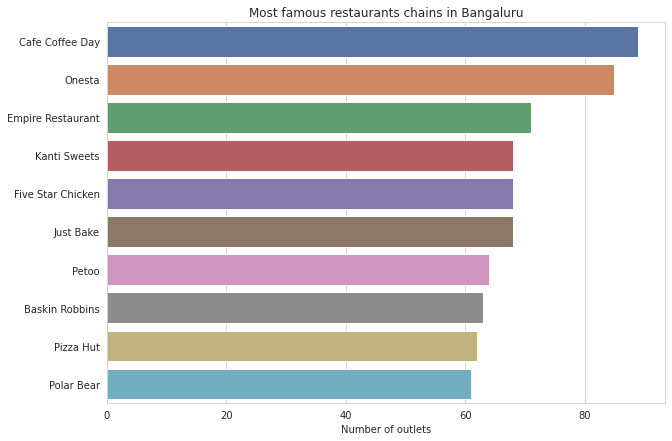

In [ ]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

## How many of the restuarants accept online orders?

using plotly, How many of the restuarants accept online orders

In [ ]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [ ]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

 One of the main advantages is that only a few lines of code are necessary to create aesthetically pleasing, interactive plots. The interactivity also offers a number of advantages over static matplotlib plots:

Saves time when initially exploring your dataset

1.   Makes it easy to modify and export your plot
2.   Offers a more ornate visualization, which is well-suited for conveying the 
3. important insights hidden within your dataset.


## What is the ratio of restaurants that provide and do not provide table booking ?

([<matplotlib.patches.Wedge at 0x7f0aa213b590>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

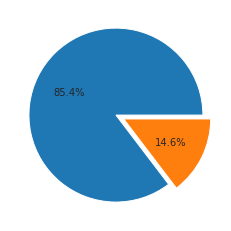

In [ ]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

## using plotly

In [ ]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [ ]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

## How many types of restaurants we have?

In [ ]:
df['rest_type'].isna().sum()

151

In [ ]:
df['rest_type'].dropna(inplace=True)

In [ ]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [ ]:
iplot([trace1])

## what is the percentage different type of restaurants?




In [ ]:
x = (df['rest_type'].value_counts().nlargest(20)/len(df))*100

In [ ]:
fig = px.pie(df, values=x, names=df['rest_type'].value_counts().nlargest(20).index,title='Pie chart')
fig.show()

At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
We can observe tha Quick Bites type restaurants dominates.

## what are the highest voted restaurant?

In [ ]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [ ]:
iplot([trace1])

## total restaurants at different locations of Bengalore

In [ ]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [ ]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


In [ ]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [ ]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [ ]:
iplot([trace1])

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Total number of variety of restaurants

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

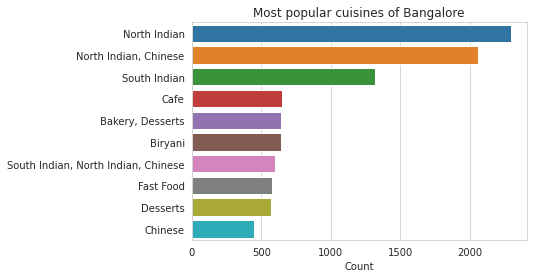

In [ ]:

cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

We can observe that North Indian,chinese,South Indian and Biriyani are most common.
It means Bengalore is more influenced by North Indian culture more than South

## Analyse Approx cost for 2 people

In [ ]:
df['approx_cost(for two people)'].isna().sum()

247

In [ ]:
# values = {'approx_cost(for two people)': '0'}
# df.fillna(values,inplace=True)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
 df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
df['approx_cost(for two people)'].unique()

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [ ]:
# impute_knn =KNNImputer(n_neighbors =3)
# approx_cost_2 =impute_knn.fit_transform(df['approx_cost(for two people)'].to_frame())

In [ ]:
# df['approx_cost(for two people)']= approx_cost_2

In [ ]:
df_rate=df.groupby('name')['approx_cost(for two people)'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','approx_cost(for two people)']
df_rate.tail(20)

,restaurant,approx_cost(for two people)
7142,Zhang's - Chinese Restaurant,700.000000
7143,Zhangs Classic,600.000000
7144,Zingron,750.000000
7145,Ziyan's Cafe 27th,300.000000
7146,Zodiac,1500.000000
7147,Zodiac - Fortune Select JP Cosmos Hotel,1800.000000
7148,Zodiac Grills,500.000000
7149,Zoey's,600.000000
7150,Zu's Doner Kebaps,350.000000
7151,Zyara,650.000000


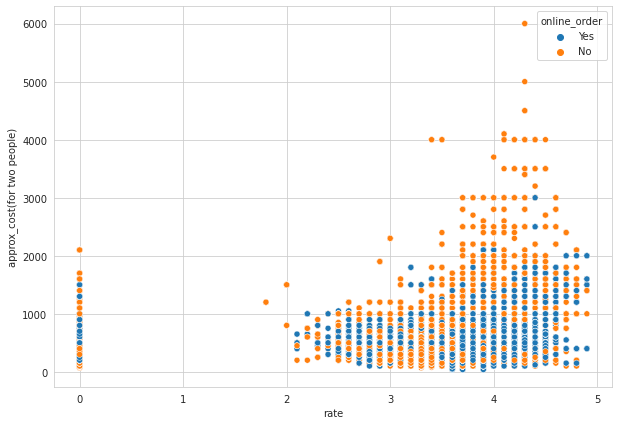

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

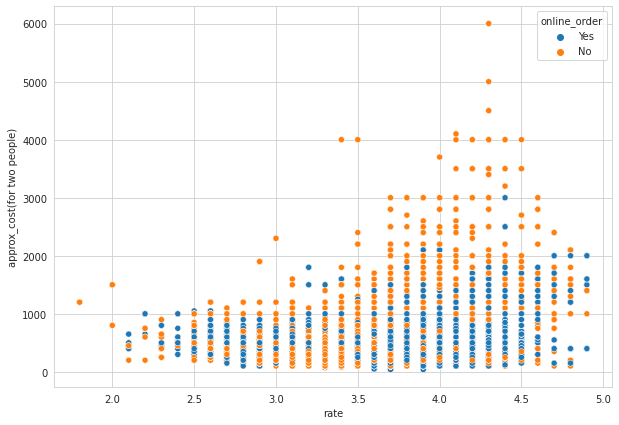

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

## from this scattterplot,we can come up with a conclusion that most of the highest rated accepts online order

## Is there any difference between votes of restaurants accepting and not accepting online orders?

In [ ]:
fig = px.box(df,x='online_order',y='votes')
fig.show()

from this boxplot,we can observe that median number of votes for both categories vary.
Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

## Is there any difference between price of restaurants accepting and not accepting online orders?

In [ ]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

Restaurants accepting online orders are more affordable than Restaurants who are not accepting online orders

## Cheapest Rate for 2 people

In [ ]:
df['approx_cost(for two people)'].min()

40

In [ ]:
df['name'].where(df['approx_cost(for two people)']==40).dropna().unique()

array(['Srinidhi Sagar Food Line', 'Srinidhi Sagar',
       'Srinidhi Sagar Deluxe'], dtype=object)

## Most costly for 2 people

In [ ]:
df['approx_cost(for two people)'].max()

6000

In [ ]:
df[df['approx_cost(for two people)']==6000]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


In [ ]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

## distribution of cost for 2 people

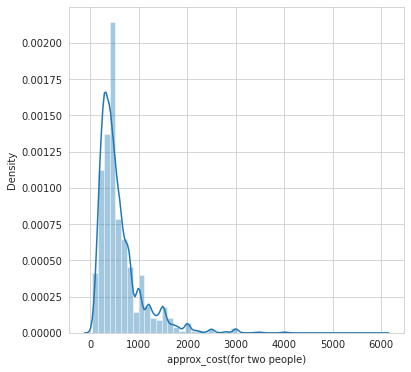

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [ ]:
px.histogram(df, x="approx_cost(for two people)")

most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

## Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [ ]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


## Top 10 Most Expensive restaurant with approx cost for 2 people

In [ ]:
data=df.copy()

In [ ]:
data.set_index('name',inplace=True)

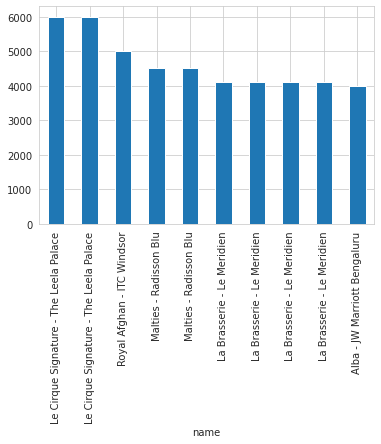

In [ ]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

## Top 10 Cheapest restaurant with approx cost for 2 people

In [ ]:
#data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nsmallest(10)

name
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar              40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar              40
Savera Cafe                 50
Savera Cafe                 50
Name: approx_cost(for two people), dtype: int64

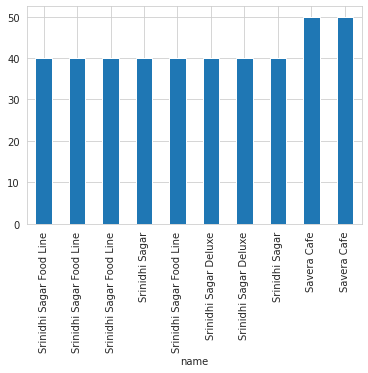

In [ ]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

## Top 10 Cheapest restaurant location wise with approx cost for 2 people

In [ ]:
data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nsmallest(10)

location
Indiranagar         40
Indiranagar         40
Indiranagar         40
Old Airport Road    40
Indiranagar         40
Domlur              40
Domlur              40
Old Airport Road    40
Shivajinagar        50
Shivajinagar        50
Name: approx_cost(for two people), dtype: int64

## all the restautant that are below than 500

In [ ]:
data[data['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [ ]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


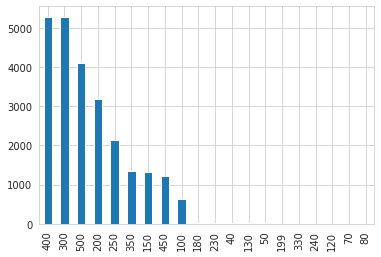

In [ ]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

In [ ]:
trace1 = go.Bar( 
        x = df_budget['approx_cost(for two people)'].value_counts().index,
        y = df_budget['approx_cost(for two people)'].value_counts(),
        name= 'Priority')
iplot([trace1])

we can conclude that 300 and 400 cost dishes are maximum in count

## Total such various affordable restaurants at different location

Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [ ]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

In [ ]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [ ]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [ ]:
location_df.head(20)

,restaurant
location,
BTM,54
Banashankari,25
Banaswadi,3
Bannerghatta Road,19
Basavanagudi,31
Basaveshwara Nagar,3
Bellandur,20
Brigade Road,11
Brookefield,16


In [ ]:
trace1 = go.Bar( 
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])

##To Visualise what are the names of those restaurant

In [ ]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())

In [ ]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

,res_names
location,
BTM,"[eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff..."
Banashankari,[CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi,"[Pooja Dosa Camp, Corner House Ice Cream, The ..."
Bannerghatta Road,"[BOX8- Desi Meals, Krishna Kuteera, Krishna Ku..."
Basavanagudi,"[Kabab Magic, Sri Guru Kottureshwara Davangere..."


Finding Best budget Restaurants in any location

In [ ]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [ ]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

## Which are the foodie areas?

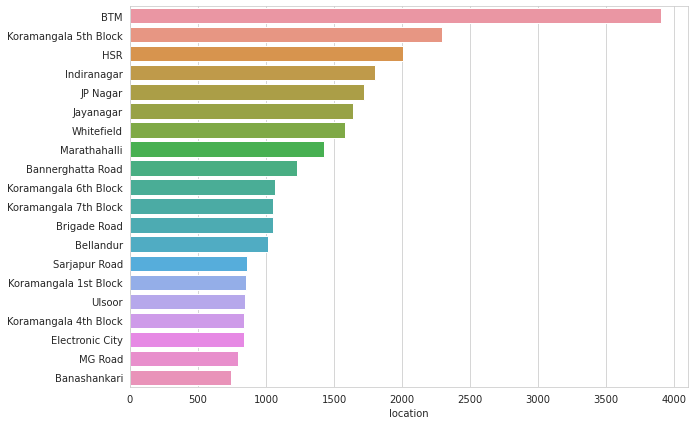

In [ ]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
BTM dominates the section by having more than 5000 restaurants.

## geographical analysis

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [ ]:
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [ ]:
locations['geo_loc']=lat_lon

In [ ]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [ ]:
locations.to_csv('zomato_locations.csv',index=False)

We have found out latitude and longitude of each location listed in the dataset using geopy.

In [ ]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,3906
1,Koramangala 5th Block,2297
2,HSR,2004
3,Indiranagar,1803
4,JP Nagar,1717


In [ ]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,3906,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2297,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)"
2,HSR,2004,Bangalore HSR,"(18.1475, 41.538889)"
3,Indiranagar,1803,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1717,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [ ]:
#Bangalore (12.97∘ N, 77.59∘ E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9059707, 77.6017374), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (44.621621, -84.790422),
       (12.93577245, 77.66676103753434), (12.9252241, 77.6367015),
       (14.5395813, 121.070371), (12.9778793, 77.6246697),
       (12.93433385, 77.63040639553275), (32.2934563, -64.78236307254568),
       (17.1452094, 79.6218777), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (40.575894, -74.1251342), (-28.5477541, 29.788093),
       (12.9417261, 77.5755021), (12.996845, 77.6130165),
       (40.7133336, -74.0092085), (33.5935063, -79.0345627),
       (13.0170347, 77.5726006), (13.0093455, 77.6377094),
       (40.7652844, -76.373824), (31.89376, -88.066644),
       (13.0141618, 

In [ ]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [ ]:
Restaurant_locations.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,3906,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2297,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)",12.934377,77.628415
2,HSR,2004,Bangalore HSR,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1803,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1717,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540


In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [ ]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 3906.0],
 [12.9343774, 77.628415, 2297.0],
 [18.1475, 41.538889, 2004.0],
 [12.9732913, 77.6404672, 1803.0],
 [12.2655944, 76.6465404, 1717.0],
 [27.64392675, 83.05280519687284, 1636.0],
 [44.3730577, -71.6118577, 1577.0],
 [12.9552572, 77.6984163, 1428.0],
 [12.9059707, 77.6017374, 1230.0],
 [12.9400321, 77.6203272, 1069.0],
 [12.9302645, 77.6332585, 1055.0],
 [44.621621, -84.790422, 1052.0],
 [12.93577245, 77.66676103753434, 1012.0],
 [12.9252241, 77.6367015, 860.0],
 [14.5395813, 121.070371, 852.0],
 [12.9778793, 77.6246697, 849.0],
 [12.93433385, 77.63040639553275, 841.0],
 [32.2934563, -64.78236307254568, 840.0],
 [17.1452094, 79.6218777, 793.0],
 [15.8876779, 75.7046777, 744.0],
 [13.0221416, 77.6403368, 695.0],
 [13.0027353, 77.5703253, 641.0],
 [40.575894, -74.1251342, 604.0],
 [-28.5477541, 29.788093, 604.0],
 [12.9417261, 77.5755021, 595.0],
 [12.996845, 77.6130165, 566.0],
 [40.7133336, -74.0092085, 546.0],
 [33.5935063, -79.0345627, 543.0

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)

In [ ]:
basemap

It is clear that restaurants tend to concentrate in central bangalore area.
The clutter of restaurants lowers are we move away from central.
